In [1]:
#import ppa
import priors
import ppa
import numpy as np
import matplotlib.pyplot as plt
from PTMCMCSampler.PTMCMCSampler import PTSampler
from chainconsumer import ChainConsumer
from num2tex import num2tex
import json
import scipy.stats as ss
    
PSR_DICT_LIST = ppa.Load_All_Pulsar_Info()
PSR_NAME_LIST = list(PSR_DICT_LIST.keys())
PSR_DICT_LIST

Do not have mpi4py package.
Do not have acor package


{'J0437-4715': {'PSR': 'J0437-4715',
  'RAJ': '04:37:15.8961737',
  'DECJ': '-47:15:09.110714',
  'DTE_DM': 0.156,
  'PX': 6.37,
  'PX_ERR': 0.09000000000000002,
  'DATA': {'10cm': 'Data/J0437-4715_10cm.txt',
   '20cm': 'Data/J0437-4715_20cm.txt'},
  'RM': {'10cm': 'ionFR_correction/J0437-4715_ionFR_10cm.txt',
   '20cm': 'ionFR_correction/J0437-4715_ionFR_20cm.txt'}},
 'J0613-0200': {'PSR': 'J0613-0200',
  'RAJ': '06:13:43.975901',
  'DECJ': '-02:00:47.23742',
  'DTE_DM': 1.024,
  'PX': 1.01,
  'PX_ERR': 0.09000000000000002,
  'DATA': {'10cm': 'Data/J0613-0200_10cm.txt',
   '20cm': 'Data/J0613-0200_20cm.txt'},
  'RM': {'10cm': 'ionFR_correction/J0613-0200_ionFR_10cm.txt',
   '20cm': 'ionFR_correction/J0613-0200_ionFR_20cm.txt'}},
 'J0614-3329': {'PSR': 'J0614-3329',
  'RAJ': '06:14:10.34823',
  'DECJ': '-33:29:54.1312',
  'DTE_DM': 2.691,
  'PX': 1.1,
  'PX_ERR': 1.1,
  'DATA': {'10cm': 'Data/J0614-3329_10cm.txt'},
  'RM': {'10cm': 'ionFR_correction/J0614-3329_ionFR_10cm.txt'}},
 'J071

In [14]:
#=====================================================#
#     M + EFAC + EQUAD                                #
#=====================================================#
Res = {}
for i,psrn in enumerate(PSR_NAME_LIST):  
    psr = ppa.Pulsar( PSR_DICT_LIST[ psrn ],order=2,iono="Subt" )
    res = {}
    for ss in psr.SUBSETS:
        lnlike,lnprior,init_gen= psr.gen_spa_likelihood(ss,p=[-1,3,-8,2  ])
        
        # sampler = PTSampler(2,lnlike,lnprior,cov = np.diag(np.ones(2))*0.01,resume=False,outDir="SPA_Chain/m1_"+psr.PSR_NAME+"_"+ss,verbose=False)
        # sampler.sample(init_gen(),100000)
        
        chain  = np.loadtxt("SPA_Chain/m1_"+psrn+"_"+ss+"/chain_1.txt",skiprows=5000)


        med1 = np.median( chain[:,0])
        min1 = med1 - np.quantile( chain[:,0],0.16 )
        max1 = np.quantile( chain[:,0],0.84 ) - med1 


        med2 = np.median( chain[:,1])
        min2 = med2 - np.quantile( chain[:,1],0.16 )
        max2 = np.quantile( chain[:,1],0.84 ) - med2


        res.update( { ss:(med1,med2)} )
        logVol = np.log( 4 * 10 )
        logz0 = lnlike([0,-np.inf ])
        logBF = logVol - np.log( np.mean(np.exp( -( chain[:,-4]-chain[:,-4].max() ) ) ) )  + chain[:,-4].max() - logz0


        print( i+1,'&',psrn,"&%.2f"%np.log10(np.median(psr.DPA_ERR[0])) ,"& $%.2f^{+%.2f}_{-%.2f}$  & $% .2f^{+%.2f}_{-%.2f}$"%(med1,max1,min1,med2,max2,min2),"&&& %.1f"%(logBF)+"\\\\" )
    Res.update({psrn:res})

1 & J0437-4715 &-3.00 & $0.14^{+0.55}_{-0.78}$  & $-1.63^{+0.01}_{-0.01}$ &&& 388410.8\\
1 & J0437-4715 &-3.00 & $-0.54^{+0.34}_{-0.31}$  & $-1.55^{+0.01}_{-0.01}$ &&& 71111.8\\
2 & J0613-0200 &-1.74 & $0.69^{+0.05}_{-0.06}$  & $-1.02^{+0.04}_{-0.05}$ &&& 10557.3\\
2 & J0613-0200 &-1.74 & $0.83^{+0.03}_{-0.03}$  & $-1.58^{+0.04}_{-0.04}$ &&& 30456.3\\
3 & J0614-3329 &-2.00 & $0.78^{+0.05}_{-0.05}$  & $-4.14^{+2.27}_{-2.64}$ &&& 813.6\\
4 & J0711-6830 &-1.70 & $0.74^{+0.02}_{-0.02}$  & $-1.23^{+0.05}_{-0.05}$ &&& 9816.8\\
4 & J0711-6830 &-1.70 & $0.65^{+0.02}_{-0.02}$  & $-1.46^{+0.02}_{-0.02}$ &&& 22367.4\\
5 & J1017-7156 &-2.10 & $0.78^{+0.05}_{-0.05}$  & $-1.26^{+0.04}_{-0.04}$ &&& 23659.2\\
5 & J1017-7156 &-2.10 & $0.68^{+0.03}_{-0.03}$  & $-1.49^{+0.03}_{-0.03}$ &&& 27409.8\\
6 & J1022+1001 &-2.67 & $0.93^{+0.02}_{-0.04}$  & $-2.66^{+0.58}_{-3.47}$ &&& 14289.3\\
6 & J1022+1001 &-2.67 & $0.58^{+0.07}_{-0.08}$  & $-1.43^{+0.01}_{-0.02}$ &&& 79188.5\\
7 & J1024-0719 &-2.35 & $0.87^{+0

In [15]:
with open("Parfile/spa_results.json",'w') as f:
    spa_results = json.dump(Res,f,indent=2)

In [4]:
#=====================================================#
#     M + EFAC                                        #
#=====================================================#
for i,psrn in enumerate(PSR_NAME_LIST):  
    psr = ppa.Pulsar( PSR_DICT_LIST[ psrn ] )
    lnlike,lnprior,init_gen= psr.gen_spa_likelihood("10cm",p=[-1,3,-8,-7.99  ])
    
    sampler = PTSampler(2,lnlike,lnprior,cov = np.diag(np.ones(2))*0.01,resume=False,outDir="SPA_Chain/m2_"+psr.PSR_NAME,verbose=False)
    sampler.sample(init_gen(),100000)
    
    chain  = np.loadtxt("SPA_Chain/m2_"+psrn+"/chain_1.txt",skiprows=5000)

    med1 = np.median( chain[:,0])
    min1 = med1 - np.quantile( chain[:,0],0.16 )
    max1 = np.quantile( chain[:,0],0.84 ) - med1 


    med2 = np.median( chain[:,1])
    min2 = med2 - np.quantile( chain[:,1],0.16 )
    max2 = np.quantile( chain[:,1],0.84 ) - med2


    
    logVol = np.log( 4 * 0.01 )
    logz0 = lnlike([0,-np.inf ])
    logBF = logVol - np.log( np.mean(np.exp( -( chain[:,-4]-chain[:,-4].max() ) ) ) )  + chain[:,-4].max() - logz0


    print( i+1,'&',psrn,"&%.2f"%np.log10(np.median(psr.DPA_ERR[0])) ,"& $%.2f^{+%.2f}_{-%.2f}$  & $% .2f^{+%.2f}_{-%.2f}$"%(med1,max1,min1,med2,max2,min2),"&&& %.1f"%(logBF)+"\\\\" )

ISM marginalizasion order: 0, 1 or 2


RuntimeError: No active exception to reraise

In [23]:
#=====================================================#
#     M + EQUAD                                       #
#=====================================================#
for i,psrn in enumerate(PSR_NAME_LIST):  
    psr = ppa.Pulsar( PSR_DICT_LIST[ psrn ] )
    lnlike,lnprior,init_gen = psr.gen_spa_likelihood("10cm",p=[-0.01,0.01,-8,2  ])
    
    #sampler = PTSampler(2,lnlike,lnprior,cov = np.diag(np.ones(2))*0.01,resume=False,outDir="SPA_Chain/m3_"+psr.PSR_NAME,verbose=False)
    #sampler.sample(init_gen(),100000)
    
    chain  = np.loadtxt("SPA_Chain/m3_"+psrn+"/chain_1.txt",skiprows=5000)

    med1 = np.median( chain[:,0])
    min1 = med1 - np.quantile( chain[:,0],0.16 )
    max1 = np.quantile( chain[:,0],0.84 ) - med1 


    med2 = np.median( chain[:,1])
    min2 = med2 - np.quantile( chain[:,1],0.16 )
    max2 = np.quantile( chain[:,1],0.84 ) - med2


    
    logVol = np.log( 0.02 * 10 )
    logz0 = lnlike([0,-np.inf ])
    logBF = logVol - np.log( np.mean(np.exp( -( chain[:,-4]-chain[:,-4].max() ) ) ) )  + chain[:,-4].max() - logz0


    print( i+1,'&',psrn,"&%.2f"%np.log10(np.median(psr.DPA_ERR[0])) ,"& $%.2f^{+%.2f}_{-%.2f}$  & $% .2f^{+%.2f}_{-%.2f}$"%(med1,max1,min1,med2,max2,min2),"&&& %.1f"%(logBF)+"\\\\" )

1 & J0437-4715 &-3.63 & $-0.00^{+0.01}_{-0.01}$  & $-1.62^{+0.01}_{-0.01}$ &&& 3829082.0\\
2 & J0613-0200 &-1.74 & $0.00^{+0.01}_{-0.01}$  & $-0.84^{+0.02}_{-0.02}$ &&& 10601.5\\
3 & J0614-3329 &-2.00 & $0.00^{+0.01}_{-0.01}$  & $-1.16^{+0.05}_{-0.04}$ &&& 860.1\\
4 & J0711-6830 &-1.70 & $0.00^{+0.01}_{-0.01}$  & $-0.81^{+0.02}_{-0.02}$ &&& 9950.6\\
5 & J1017-7156 &-2.11 & $0.00^{+0.01}_{-0.01}$  & $-1.11^{+0.02}_{-0.02}$ &&& 27849.3\\
6 & J1022+1001 &-2.71 & $0.00^{+0.01}_{-0.01}$  & $-1.60^{+0.02}_{-0.02}$ &&& 21284.3\\
7 & J1024-0719 &-2.36 & $0.00^{+0.01}_{-0.01}$  & $-1.42^{+0.02}_{-0.02}$ &&& 7137.5\\
8 & J1045-4509 &-2.26 & $0.00^{+0.01}_{-0.01}$  & $-1.35^{+0.02}_{-0.02}$ &&& 6543.1\\
9 & J1125-6014 &-2.17 & $0.00^{+0.01}_{-0.01}$  & $-1.36^{+0.02}_{-0.02}$ &&& 2247.9\\
10 & J1545-4550 &-2.65 & $0.00^{+0.01}_{-0.01}$  & $-1.63^{+0.02}_{-0.02}$ &&& 12337.9\\
11 & J1600-3053 &-2.66 & $0.00^{+0.01}_{-0.01}$  & $-1.55^{+0.02}_{-0.02}$ &&& 17963.4\\
12 & J1603-7202 &-1.96 & $0.00^{+

In [20]:
#=====================================================#
#     M vs No M                                       #
#=====================================================#
for i,psrn in enumerate(PSR_NAME_LIST):  
    psr_2 = ppa.Pulsar( PSR_DICT_LIST[ psrn ] , order=2 )
    psr_1 = ppa.Pulsar( PSR_DICT_LIST[ psrn ] , order=1 )
    psr_0 = ppa.Pulsar( PSR_DICT_LIST[ psrn ] , order=0 )

    lnlike_2,lnprior,init_gen = psr_2.gen_spa_likelihood("10cm",p=[-0.01,0.01,-8,-7.99  ])
    lnlike_1,lnprior,init_gen = psr_1.gen_spa_likelihood("10cm",p=[-0.01,0.01,-8,-7.99  ])
    lnlike_0,lnprior,init_gen = psr_0.gen_spa_likelihood("10cm",p=[-0.01,0.01,-8,-7.99  ])
    


In [15]:
Res = {}
#=====================================================#
#    Summarize                                        #
#=====================================================#
test = 0
for i,psrn in enumerate(PSR_NAME_LIST[:]):  
    psr = ppa.Pulsar( PSR_DICT_LIST[ psrn ] )
    lnlike,lnprior,init_gen = psr.gen_spa_likelihood("10cm")
    
    chain1  = np.loadtxt("SPA_Chain/m1_"+psrn+"/chain_1.txt",skiprows=5000)
    chain2 = np.loadtxt("SPA_Chain/m2_"+psrn+"/chain_1.txt",skiprows=5000)
    chain3 = np.loadtxt("SPA_Chain/m3_"+psrn+"/chain_1.txt",skiprows=5000)




    med1 = np.median( chain1[:,0])
    min1 = med1 - np.quantile( chain1[:,0],0.16 )
    max1 = np.quantile( chain1[:,0],0.84 ) - med1 


    med2 = np.median( chain1[:,1])
    min2 = med2 - np.quantile( chain1[:,1],0.16 )
    max2 = np.quantile( chain1[:,1],0.84 ) - med2



    Res.update({psrn:{ "10cm":(med1,med2)}})
    
    logz0 = lnlike([0,-np.inf])
    #test += logz0

    logBF1 = np.log( 0.02 * 0.01 * 0.1 ) - np.log( np.mean(np.exp( -( chain1[:,-4]-chain1[:,-4].max() ) ) ) )  + chain1[:,-4].max() - logz0
    logBF2 = np.log( 4 * 0.01 * 0.1 ) - np.log( np.mean(np.exp( -( chain2[:,-4]-chain2[:,-4].max() ) ) ) )  + chain2[:,-4].max() - logz0
    logBF3 = np.log( 4 * 10 * 0.1 ) - np.log( np.mean(np.exp( -( chain3[:,-4]-chain3[:,-4].max() ) ) ) )  + chain3[:,-4].max() - logz0



    psr_2 = ppa.Pulsar( PSR_DICT_LIST[ psrn ] , order=2 )
    psr_1 = ppa.Pulsar( PSR_DICT_LIST[ psrn ] , order=1 )
    psr_0 = ppa.Pulsar( PSR_DICT_LIST[ psrn ] , order=0 )
    psr_n = ppa.Pulsar( PSR_DICT_LIST[ psrn ] , order=None )

    lnlike_2,lnprior,init_gen = psr_2.gen_spa_likelihood("10cm",p=[-0.01,0.01,-8,-7.99  ])
    lnlike_1,lnprior,init_gen = psr_1.gen_spa_likelihood("10cm",p=[-0.01,0.01,-8,-7.99  ])
    lnlike_0,lnprior,init_gen = psr_0.gen_spa_likelihood("10cm",p=[-0.01,0.01,-8,-7.99  ])
    lnlike_n,lnprior,init_gen = psr_n.gen_spa_likelihood("10cm",p=[-0.01,0.01,-8,-7.99  ])
    
    dlnlike10 = lnlike_1([0,-np.inf ]) - lnlike_0([0,-np.inf ])
    dlnlike21 =  lnlike_2([0,-np.inf ]) - lnlike_1([0,-np.inf ])



    # print( i+1,'&',psrn,"&%.2f"%np.log10(np.median(psr.DPA_ERR)) ,
    #       "& $%.2f^{+%.2f}_{-%.2f}$  & $% .2f^{+%.2f}_{-%.2f}$"%(med1,max1,min1,med2,max2,min2),
    #       "&%.1f&%.1f& %.1f"%(logBF1*np.log10(np.exp(1)),logBF2*np.log10(np.exp(1)),logBF*np.log10(np.exp(1)) )+"\\\\" )
    
    print( i+1,'&',psrn,"&%.2f"%np.log10(np.median(psr.DPA_ERR)),"&%.2f"%np.log10(np.std(psr.DPA[0])) ,
        "  & $% .2f^{+%.2f}_{-%.2f}$& $% .2f^{+%.2f}_{-%.2f}$"%(med1,max1,min1,med2,max2,min2),
        "&${:.1f}$".format(num2tex(dlnlike10)) , "&${:.1f}$".format(num2tex(dlnlike21))  ,  "&${:.1f}$".format(num2tex(logBF1)) +"\\\\"  )
        #   "  &  %.1e  &  %.1e  &  %.1f "%(logBF1,logBF2 - logBF1,logBF3-logBF2 )+"\\\\" )

1 & J0437-4715 &-3.63 &-1.61   & $ 1.66^{+0.03}_{-0.03}$& $-1.78^{+0.02}_{-0.02}$ &$201299.5$ &$6.8$ &$3829131.5$\\
2 & J0613-0200 &-1.74 &-0.83   & $ 0.69^{+0.05}_{-0.06}$& $-1.01^{+0.04}_{-0.05}$ &$52.3$ &$226.5$ &$10605.1$\\
3 & J0614-3329 &-2.00 &-1.14   & $ 0.79^{+0.05}_{-0.05}$& $-4.17^{+2.35}_{-2.67}$ &$28.2$ &$7.8$ &$853.6$\\
4 & J0711-6830 &-1.70 &-0.78   & $ 0.74^{+0.02}_{-0.02}$& $-1.22^{+0.05}_{-0.06}$ &$18.7$ &$16.7$ &$10007.4$\\
5 & J1017-7156 &-2.11 &-1.10   & $ 0.78^{+0.05}_{-0.06}$& $-1.26^{+0.04}_{-0.04}$ &$216.4$ &$197.2$ &$27854.4$\\
6 & J1022+1001 &-2.71 &-1.58   & $ 0.91^{+0.03}_{-0.03}$& $-1.92^{+0.05}_{-0.06}$ &$515.9$ &$1318.4$ &$21316.3$\\
7 & J1024-0719 &-2.36 &-1.40   & $ 0.87^{+0.03}_{-0.06}$& $-2.07^{+0.29}_{-3.81}$ &$147.4$ &$277.3$ &$7142.3$\\
8 & J1045-4509 &-2.26 &-1.33   & $ 0.86^{+0.02}_{-0.02}$& $-5.05^{+2.10}_{-2.02}$ &$288.6$ &$663.0$ &$6563.1$\\
9 & J1125-6014 &-2.17 &-1.32   & $ 0.72^{+0.02}_{-0.02}$& $-5.06^{+2.12}_{-2.01}$ &$68.9$ &$13.9$ &$22

In [16]:
with open("Parfile/spa_results.json",'w') as f:
    spa_results = json.dump(Res,f,indent=2)

This method is deprecated. Please use chainConsumer.plotter.plot instead


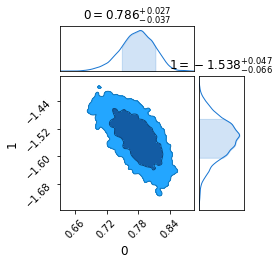

In [18]:
chain = np.loadtxt("SPA_Chain/m1_J2145-0750/chain_1.txt",skiprows = 5000)
c =ChainConsumer()
c.add_chain(chain[:,:-4])
c.plot();

In [ ]:
# """
# To examine the pulsar distance prior
# """
# psr = axion_ppa.Pulsar(PSR_DICT_LIST[ PSR_NAME_LIST[0]] )
# x = np.linspace(0,2,1000)
# P = [psr.DTE_PRIOR(xi) for xi in x]
# plt.plot(x,np.exp(P))
# plt.grid()
# print(psr.PSR_NAME, psr.DTE)

# lnlike,lnprior,init_gen = psr.gen_spa_likelihood()

In [ ]:

#=====================================================#
#    Summarize                                        #
#=====================================================#
test = 0
for i,psrn in enumerate(PSR_NAME_LIST[:]):  
    psr = ppa.Pulsar( PSR_DICT_LIST[ psrn ] )
    lnlike,lnprior,init_gen = psr.gen_spa_likelihood("10cm")
    
    chain  = np.loadtxt("SPA_Chain/"+psrn+"/chain_1.txt",skiprows=10000)
    chain1 = np.loadtxt("SPA_Chain/m1_"+psrn+"/chain_1.txt",skiprows=10000)
    chain2 = np.loadtxt("SPA_Chain/m2_"+psrn+"/chain_1.txt",skiprows=10000)


    med1 = np.median( chain[:,0])
    min1 = med1 - np.quantile( chain[:,0],0.16 )
    max1 = np.quantile( chain[:,0],0.84 ) - med1


    med2 = np.median( chain[:,1])
    min2 = med2 - np.quantile( chain[:,1],0.16 )
    max2 = np.quantile( chain[:,1],0.84 ) - med2
    
    logz0 = lnlike([0,-np.inf])
    test += logz0
    logBF = np.log( 5*10 ) - np.log( np.mean(np.exp( -( chain[:,-4]-chain[:,-4].max() ) ) ) )  + chain[:,-4].max() - logz0
    logBF1 = np.log( 5*0.1 ) - np.log( np.mean(np.exp( -( chain1[:,-4]-chain1[:,-4].max() ) ) ) )  + chain1[:,-4].max() - logz0
    logBF2 = np.log( 0.02*10 ) - np.log( np.mean(np.exp( -( chain2[:,-4]-chain2[:,-4].max() ) ) ) )  + chain2[:,-4].max() - logz0


    # print( i+1,'&',psrn,"&%.2f"%np.log10(np.median(psr.DPA_ERR)) ,
    #       "& $%.2f^{+%.2f}_{-%.2f}$  & $% .2f^{+%.2f}_{-%.2f}$"%(med1,max1,min1,med2,max2,min2),
    #       "&%.1f&%.1f& %.1f"%(logBF1*np.log10(np.exp(1)),logBF2*np.log10(np.exp(1)),logBF*np.log10(np.exp(1)) )+"\\\\" )
    
    print( i+1,'&',psrn,"&%.2f"%np.log10(np.median(psr.DPA_ERR)),"&%.2f"%np.log10(np.std(psr.DPA[0])) ,
          "& $%.2f^{+%.2f}_{-%.2f}$  & $% .2f^{+%.2f}_{-%.2f}$"%(med1,max1,min1,med2,max2,min2),
          "&%.1f&%.1f"%(logBF2 - logBF1,logBF-logBF1 )+"\\\\" )

In [18]:
x = [1,2]
x+=[3]
x

[1, 2, 3]